Mean Squared Error: 33780509.57479164


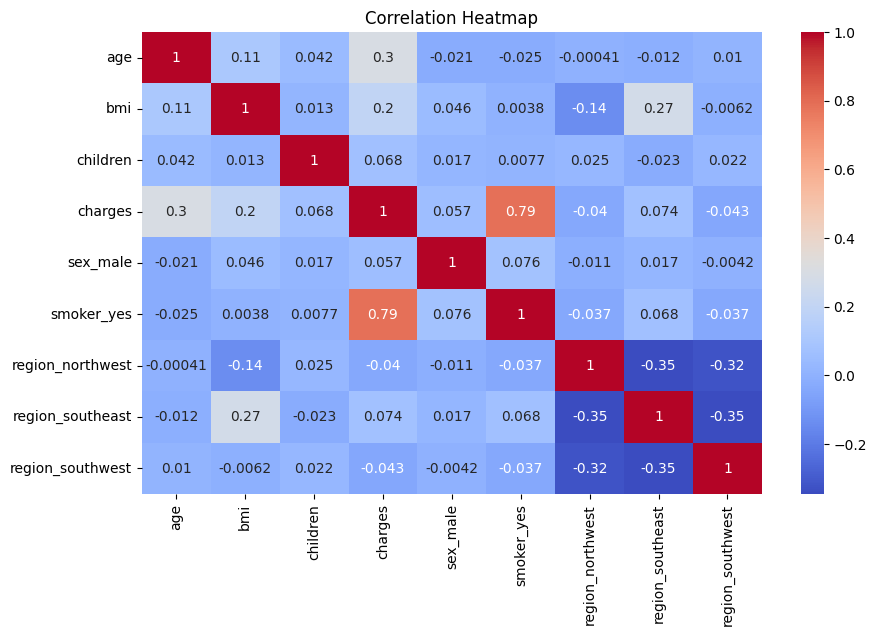

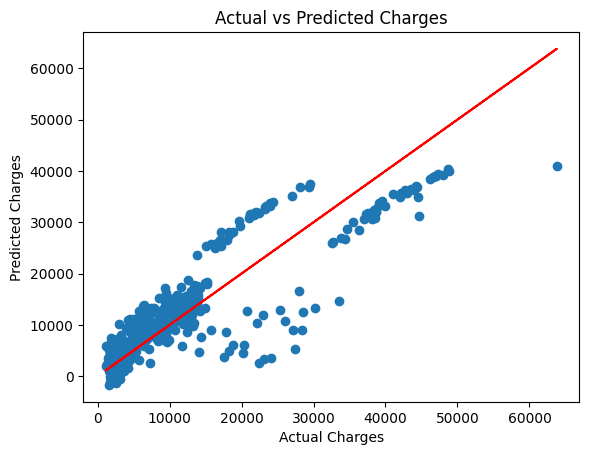

In [1]:
'''
1) With given data sets apply Multiple Linear Regression and determine the appropriate regression 
parameters using the concept of matrices and vectors representation of the regression variables and 
parameters.  
Also draw the scatter and regression plots for the given set of dependent and independent variables. 

'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

insurance_data = pd.read_csv('insurance.csv')
insurance_data = pd.get_dummies(insurance_data, drop_first=True)

X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10, 6))
sns.heatmap(insurance_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

output_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
output_df['Intercept'] = model.intercept_
output_df['Mean Squared Error'] = mse
output_df.to_csv('insurance_multiple_linear_regression_output.csv', index=False)

              precision    recall  f1-score   support

           0       0.95      0.57      0.71        61
           1       0.69      0.97      0.80        59

    accuracy                           0.77       120
   macro avg       0.82      0.77      0.76       120
weighted avg       0.82      0.77      0.76       120

[[35 26]
 [ 2 57]]


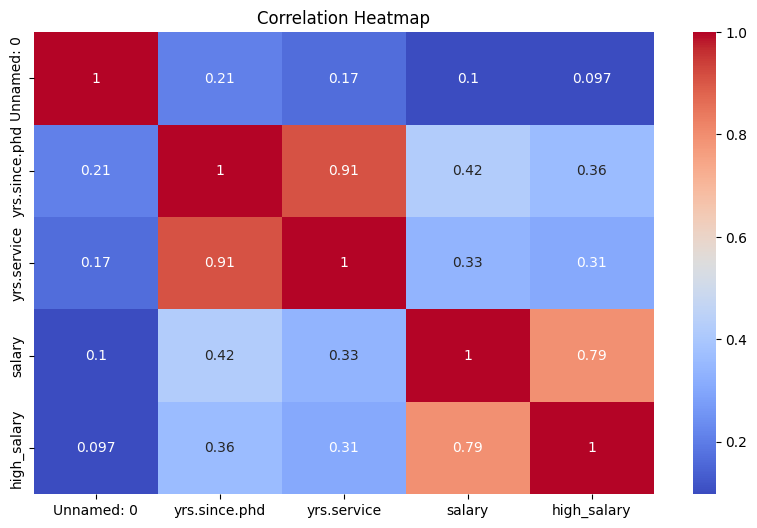

In [2]:
'''
2) With given data sets apply Logistic Regression and determine the appropriate regression 
parameters.  
Also draw the scatter and regression plots for the given set of dependent and independent variables. 

'''
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

salaries_data = pd.read_csv('Salaries.csv')

threshold = salaries_data['salary'].median()
salaries_data['high_salary'] = (salaries_data['salary'] > threshold).astype(int)

X = salaries_data.drop(['Unnamed: 0', 'salary', 'high_salary'], axis=1)
y = salaries_data['high_salary']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

output_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]})
output_df['Intercept'] = logistic_model.intercept_[0]
output_df.to_csv('salaries_logistic_regression_output.csv', index=False)

plt.figure(figsize=(10, 6))
numeric_cols = salaries_data.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(salaries_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [3]:
'''
3)Apply Gradient Descent on the following three regression algorithms: 
(a) Simple Linear Regression

'''
import numpy as np
import pandas as pd

data = pd.read_csv('insurance.csv')

X = data['age'].values 
y = data['charges'].values

m = 0
c = 0
learning_rate = 0.01
epochs = 1000

n = float(len(X))

m_values = []
c_values = []
cost_values = []
iterations = []

for i in range(epochs):
    y_pred = m * X + c  
    cost = (1/n) * sum([val**2 for val in (y - y_pred)]) 
    
    dm = -(2/n) * sum(X * (y - y_pred))
    dc = -(2/n) * sum(y - y_pred)
    m = m - learning_rate * dm 
    c = c - learning_rate * dc
    
    iterations.append(i)
    m_values.append(m)
    c_values.append(c)
    cost_values.append(cost)
    
    if i % 100 == 0: 
        print(f"Iteration {i}, Slope: {m}, Intercept: {c}, Cost: {cost}")

print(f"Slope: {m}, Intercept: {c}, Final Cost: {cost}")

output_df = pd.DataFrame({'Iteration': iterations, 'Slope': m_values, 'Intercept': c_values, 'Cost': cost_values})
output_df.to_csv('simple_linear_regression_gradient_descent.csv', index=False)

Iteration 0, Slope: 11422.611244832313, Intercept: 265.40844530282516, Cost: 322646873.58870494
Iteration 100, Slope: 6.555345285090364e+156, Intercept: 1.4819292601751568e+155, Cost: inf


C:\Users\Aakanxa Modha\AppData\Local\Temp\ipykernel_3568\144490229.py:28: RuntimeWarning: overflow encountered in scalar add
  cost = (1/n) * sum([val**2 for val in (y - y_pred)])
C:\Users\Aakanxa Modha\AppData\Local\Temp\ipykernel_3568\144490229.py:28: RuntimeWarning: overflow encountered in scalar power
  cost = (1/n) * sum([val**2 for val in (y - y_pred)])
C:\Users\Aakanxa Modha\AppData\Local\Temp\ipykernel_3568\144490229.py:30: RuntimeWarning: overflow encountered in scalar add
  dm = -(2/n) * sum(X * (y - y_pred))
C:\Users\Aakanxa Modha\AppData\Local\Temp\ipykernel_3568\144490229.py:32: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - learning_rate * dm


Iteration 200, Slope: nan, Intercept: nan, Cost: nan
Iteration 300, Slope: nan, Intercept: nan, Cost: nan
Iteration 400, Slope: nan, Intercept: nan, Cost: nan
Iteration 500, Slope: nan, Intercept: nan, Cost: nan
Iteration 600, Slope: nan, Intercept: nan, Cost: nan
Iteration 700, Slope: nan, Intercept: nan, Cost: nan
Iteration 800, Slope: nan, Intercept: nan, Cost: nan
Iteration 900, Slope: nan, Intercept: nan, Cost: nan
Slope: nan, Intercept: nan, Final Cost: nan


In [4]:
'''
3)Apply Gradient Descent on the following three regression algorithms: 
(b) Multiple Linear Regression

'''
import numpy as np
import pandas as pd

data = pd.read_csv('insurance.csv')

X = data[['age', 'bmi', 'children']].values
y = data['charges'].values

X = np.c_[np.ones(X.shape[0]), X]

theta = np.zeros(X.shape[1])
learning_rate = 0.01
epochs = 1000

n = len(y) 

theta_values = []
cost_values = []
iterations = []

for i in range(epochs):
    y_pred = X.dot(theta)
    cost = (1/(2*n)) * np.sum((y_pred - y) ** 2)

    gradient = (1/n) * X.T.dot(y_pred - y) 
    theta = theta - learning_rate * gradient

    iterations.append(i)
    theta_values.append(theta.copy())
    cost_values.append(cost)
    
    if i % 100 == 0:
        print(f"Iteration {i}, Weights: {theta}, Cost: {cost}")

print(f"Weights: {theta}, Final Cost: {cost}")

output_df = pd.DataFrame({
    'Iteration': iterations, 
    'Cost': cost_values,
    'Weights': [theta.tolist() for theta in theta_values]
})
output_df.to_csv('multiple_linear_regression_gradient_descent.csv', index=False)

Iteration 0, Weights: [ 132.70422265 5711.30562242 4215.52581692  155.21953677], Cost: 161323436.79435235
Iteration 100, Weights: [2.39093946e+142 1.01639227e+144 7.47333260e+143 2.64981808e+142], Cost: 3.2758739155963774e+288
Iteration 200, Weights: [4.41729978e+282 1.87780135e+284 1.38071043e+284 4.89558226e+282], Cost: inf
Iteration 300, Weights: [nan nan nan nan], Cost: nan
Iteration 400, Weights: [nan nan nan nan], Cost: nan
Iteration 500, Weights: [nan nan nan nan], Cost: nan
Iteration 600, Weights: [nan nan nan nan], Cost: nan
Iteration 700, Weights: [nan nan nan nan], Cost: nan
Iteration 800, Weights: [nan nan nan nan], Cost: nan
Iteration 900, Weights: [nan nan nan nan], Cost: nan
Weights: [nan nan nan nan], Final Cost: nan


C:\Users\Aakanxa Modha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Aakanxa Modha\AppData\Local\Temp\ipykernel_3568\1674312555.py:28: RuntimeWarning: overflow encountered in square
  cost = (1/(2*n)) * np.sum((y_pred - y) ** 2)
C:\Users\Aakanxa Modha\AppData\Local\Temp\ipykernel_3568\1674312555.py:31: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * gradient


In [5]:
'''
3)Apply Gradient Descent on the following three regression algorithms: 
(c) Logistic Regression.  
And display the appropriate values of parameters which result in reduction of the respective cost 
functions.
'''
import numpy as np
import pandas as pd

data = pd.read_csv('insurance.csv')

X = data[['age', 'bmi', 'children']].values 
y = (data['smoker'] == 'yes').astype(int).values 

X = np.c_[np.ones(X.shape[0]), X]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

theta = np.zeros(X.shape[1])
learning_rate = 0.01
epochs = 1000

n = len(y)

theta_values = []
cost_values = []
iterations = []

for i in range(epochs):
    z = X.dot(theta)
    y_pred = sigmoid(z)
    
    cost = -(1/n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    gradient = (1/n) * X.T.dot(y_pred - y) 
    theta = theta - learning_rate * gradient 

    iterations.append(i)
    theta_values.append(theta.copy())
    cost_values.append(cost)
    
    if i % 100 == 0:
        print(f"Iteration {i}, Weights: {theta}, Cost: {cost}")

print(f"Weights: {theta}, Final Cost: {cost}")

output_df = pd.DataFrame({
    'Iteration': iterations, 
    'Cost': cost_values,
    'Weights': [theta.tolist() for theta in theta_values]
})
output_df.to_csv('logistic_regression_gradient_descent.csv', index=False)

Iteration 0, Weights: [-0.00295217 -0.11716368 -0.09043122 -0.00319507], Cost: 0.6931471805599453
Iteration 100, Weights: [-0.00488435 -0.13664357 -0.10712625 -0.000187  ], Cost: 0.7677873840253943
Iteration 200, Weights: [-0.00697372 -0.18201744 -0.14039038  0.00205932], Cost: 1.0070808254869614
Iteration 300, Weights: [-0.00633259 -0.10347423 -0.07563276  0.00688159], Cost: 2.309597594302029
Iteration 400, Weights: [-0.00589655 -0.02501793 -0.02285732  0.01118553], Cost: 0.5137016174108731
Iteration 500, Weights: [-0.0066724   0.01106398  0.01002035  0.01379457], Cost: 0.6357647456527138
Iteration 600, Weights: [-0.01325516 -0.17464778 -0.1322859   0.00978008], Cost: 0.9509837266167316
Iteration 700, Weights: [-0.01059542  0.01452813  0.00721293  0.01585086], Cost: 0.6695421942010719
Iteration 800, Weights: [-0.01471113 -0.10417835 -0.07513547  0.01420736], Cost: 0.6471544485591739
Iteration 900, Weights: [-0.01361359  0.01309948  0.00724657  0.01827017], Cost: 0.736748578525074
Weig